In [24]:
from pybaseball.lahman import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
Teams_dirty = teams()
Teams_dirty

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2018,NL,SLN,STL,C,3,162,81.0,88,74,...,151,0.978,St. Louis Cardinals,Busch Stadium III,3403587.0,97,96,STL,SLN,SLN
2891,2018,AL,TBA,TBD,E,3,162,81.0,90,72,...,136,0.986,Tampa Bay Rays,Tropicana Field,1154973.0,97,97,TBR,TBA,TBA
2892,2018,AL,TEX,TEX,W,5,162,81.0,67,95,...,168,0.980,Texas Rangers,Rangers Ballpark in Arlington,2107107.0,112,113,TEX,TEX,TEX
2893,2018,AL,TOR,TOR,E,4,162,81.0,73,89,...,138,0.983,Toronto Blue Jays,Rogers Centre,2325281.0,97,98,TOR,TOR,TOR


#### Feature List  
Lahman Features:
* Runs per game  
* Homeruns per game
* Hits per game  
* Pitcher strikeouts per game  
* Batter strikeouts per game  
* Proportion of complete games thrown by pitchers  

In [51]:
#clean the datasat
Teams = Teams_dirty.dropna(subset=['G', 'R', 'HR', 'H', 'SOA', 'SO', 'CG', 'attendance']).copy()

In [52]:
#We can start by calculating our Lahman features for the 'Teams' dataset  

#Runs per game
Teams['R_per_G'] = Teams['R'] / Teams['G']

#Homeruns per game
Teams['HR_per_G'] = Teams['HR'] / Teams['G']

#Hits per game
Teams['H_per_G'] = Teams['H'] / Teams['G']

#Pitcher strikeouts per game
Teams['SO_p_per_G'] = Teams['SOA'] / Teams['G']

#Batter strikeouts per game
Teams['SO_b_per_G'] = Teams['SO'] / Teams['G']

#Proportion of games that were complete games
Teams['CG_prop'] = Teams['CG'] / Teams['G']

In [53]:
Teams

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,PPF,teamIDBR,teamIDlahman45,teamIDretro,R_per_G,HR_per_G,H_per_G,SO_p_per_G,SO_b_per_G,CG_prop
240,1890,NL,BRO,LAD,NaN,1,129,NaN,86,43,...,97,BRO,BRO,BRO,6.852713,0.333333,9.038760,3.124031,2.798450,0.891473
242,1890,NL,BSN,ATL,NaN,5,134,NaN,76,57,...,105,BSN,BSN,BSN,5.694030,0.231343,9.104478,3.776119,3.843284,0.985075
244,1890,NL,CHN,CHC,NaN,2,139,NaN,83,53,...,102,CHC,CHN,CHN,6.093525,0.482014,9.143885,3.625899,3.697842,0.906475
246,1890,NL,CIN,CIN,NaN,4,134,NaN,77,55,...,101,CIN,CIN,CIN,5.619403,0.201493,8.977612,3.641791,2.813433,0.925373
247,1890,NL,CL4,CLV,NaN,7,136,NaN,44,88,...,97,CLV,CL4,CL4,4.632353,0.154412,7.889706,2.250000,3.485294,0.948529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2018,NL,SLN,STL,C,3,162,81.0,88,74,...,96,STL,SLN,SLN,4.685185,1.265432,8.450617,8.253086,8.518519,0.006173
2891,2018,AL,TBA,TBD,E,3,162,81.0,90,72,...,97,TBR,TBA,TBA,4.419753,0.925926,8.734568,8.771605,8.567901,0.000000
2892,2018,AL,TEX,TEX,W,5,162,81.0,67,95,...,113,TEX,TEX,TEX,4.549383,1.197531,8.074074,6.919753,9.160494,0.006173
2893,2018,AL,TOR,TOR,E,4,162,81.0,73,89,...,98,TOR,TOR,TOR,4.376543,1.339506,8.246914,8.012346,8.561728,0.000000


In [54]:
feat_array = Teams.values[:,[42, 48, 49, 50, 51, 52, 53]]

In [55]:
from sklearn.cluster import KMeans

In [56]:
kmeans = KMeans(n_clusters=7, random_state=42).fit(feat_array)

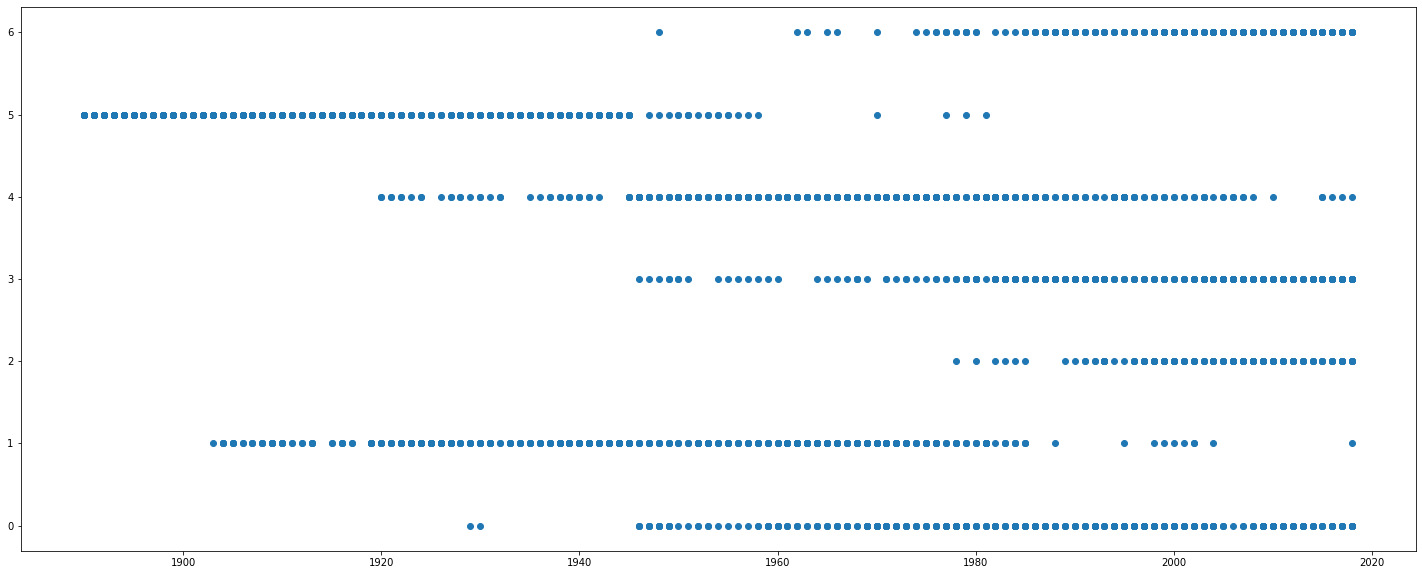

In [57]:
years = Teams['yearID']
labels = kmeans.labels_
fig,ax = plt.subplots(figsize=(25,10))
ax.scatter(years, labels)